In [1]:
# Project name: Bank Loan Default Model
# Team Members: Jaspreet Kaur Saini, Amiteshwar Singh, Hansraj Benipal, Yash Nilesh Shah, Lokesh Kaushik


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import opendatasets as od
od.download(
    "https://www.kaggle.com/datasets/gauravduttakiit/loan-defaulter")

Skipping, found downloaded files in ".\loan-defaulter" (use force=True to force download)


In [4]:
# Import data

In [3]:
# Loading Applications for loan dataset
file =('loan-defaulter/application_data.csv')
df_app = pd.read_csv(file)
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Loading Previous Applications(customers) dataset
file =('loan-defaulter/previous_application.csv')
df_prev = pd.read_csv(file)
df_prev.head()


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Inspecting data dataframes
# Application dataframe
print("Dimension of df_app: ",df_app.shape)
df_app.info()

Dimension of df_app:  (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
df_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
# Previous dataframe
print("Dimension of df_prev: ",df_prev.shape)
df_prev.info()

Dimension of df_prev:  (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_

In [8]:
df_prev.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [9]:
# checking missing data in appications for loan data
null_df_app_pct = pd.DataFrame()
null_df_app_pct['Null Percentage']= round(df_app.isnull().sum() / len(df_app) * 100.00,2)
null_df_app_pct=null_df_app_pct.rename_axis('Column Name').reset_index()
null_df_app_pct

,Column Name,Null Percentage
0,SK_ID_CURR,0.0
1,TARGET,0.0
2,NAME_CONTRACT_TYPE,0.0
3,CODE_GENDER,0.0
4,FLAG_OWN_CAR,0.0
...,...,...
117,AMT_REQ_CREDIT_BUREAU_DAY,13.5
118,AMT_REQ_CREDIT_BUREAU_WEEK,13.5
119,AMT_REQ_CREDIT_BUREAU_MON,13.5
120,AMT_REQ_CREDIT_BUREAU_QRT,13.5


In [10]:
print("Out of", df_app.shape[1],"columns,", (null_df_app_pct["Null Percentage"]>0).sum(),"columns have missing values.")
print("Out of these", (null_df_app_pct["Null Percentage"]>0).sum(), "columns,", (null_df_app_pct["Null Percentage"]>40).sum(),"columns have more than 40% missing values.")


Out of 122 columns, 64 columns have missing values.
Out of these 64 columns, 49 columns have more than 40% missing values.


In [11]:
# checking missing data in previous loan data
null_df_prev_pct = pd.DataFrame()
null_df_prev_pct['Null Percentage']= round(df_prev.isnull().sum() / len(df_prev) * 100.00,2)
null_df_prev_pct=null_df_prev_pct.rename_axis('Column Name').reset_index()
null_df_prev_pct

,Column Name,Null Percentage
0,SK_ID_PREV,0.00
1,SK_ID_CURR,0.00
2,NAME_CONTRACT_TYPE,0.00
3,AMT_ANNUITY,22.29
4,AMT_APPLICATION,0.00
5,AMT_CREDIT,0.00
6,AMT_DOWN_PAYMENT,53.64
7,AMT_GOODS_PRICE,23.08
8,WEEKDAY_APPR_PROCESS_START,0.00
9,HOUR_APPR_PROCESS_START,0.00


In [12]:
print("Out of", df_prev.shape[1],"columns,", (null_df_prev_pct["Null Percentage"]>0).sum(),"columns have missing values.")
print("Out of these", (null_df_prev_pct["Null Percentage"]>0).sum(), "columns,", (null_df_prev_pct["Null Percentage"]>40).sum(),"columns have more than 40% missing values.")


Out of 37 columns, 15 columns have missing values.
Out of these 15 columns, 11 columns have more than 40% missing values.


In [13]:
# Removing cols with null values greater than 40% in application file

columns_to_drop_df_app = null_df_app_pct[null_df_app_pct["Null Percentage"] > 40]['Column Name'].tolist()
df_app = df_app.drop(columns=columns_to_drop_df_app)

In [14]:
# Removing column with null values greater than 40% in previous file
columns_to_drop_df_prev = null_df_prev_pct[null_df_prev_pct["Null Percentage"] > 40]['Column Name'].tolist()
df_prev = df_prev.drop(columns=columns_to_drop_df_prev)

In [15]:
# Check number columns after dropping columns with null values greater than 40% 
print("Application data:", df_app.shape)
print("previous data:", df_prev.shape)

Application data: (307511, 73)
previous data: (1670214, 26)


In [9]:
# Adding new variable to application data
df_app['TARGET_STATUS']=np.where(df_app['TARGET']==0,"No Default","Default")
df_app[['TARGET','TARGET_STATUS']].head()

,TARGET,TARGET_STATUS
0,1,Default
1,0,No Default
2,0,No Default
3,0,No Default
4,0,No Default


In [17]:
# Performing left join on 'SK_ID_CURR'
result_df = pd.merge(df_app, df_prev, on='SK_ID_CURR', how='left')

# Displaying the result
result_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest


In [18]:
# Replcaing missing value with Median value of each column
def replace_missing_with_median(df):
    # Calculate median for each column
    median_values = df.median()

    # Replace missing values with median values
    df_filled = df.fillna(median_values)

    return df_filled

In [19]:
replace_missing_with_median(result_df)

C:\Users\jaspr\AppData\Local\Temp\ipykernel_1816\3874457170.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_values = df.median()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430150,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,24.0,middle,Cash X-Sell: middle
1430151,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Repeater,XNA,Cards,walk-in,Country-wide,20.0,Connectivity,0.0,XNA,Card Street
1430152,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,60.0,low_normal,Cash Street: low
1430153,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6.0,XNA,36.0,low_normal,Cash X-Sell: low


In [20]:
# checking the number of previous loans

df1=pd.DataFrame(result_df.groupby('SK_ID_CURR')['SK_ID_PREV'].nunique().reset_index())
df1=df1.rename(columns={'SK_ID_PREV': 'Number_of_Previous_Loans'})
df1

,SK_ID_CURR,Number_of_Previous_Loans
0,100002,1
1,100003,3
2,100004,1
3,100006,9
4,100007,6
...,...,...
307506,456251,1
307507,456252,1
307508,456253,2
307509,456254,2


In [26]:
df_default=df_app
correlation_matrix = df_app.corr()
correlation_matrix

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,...,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,...,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,...,0.004031,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,...,0.003130,0.002408,0.000242,-0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838,...,0.034329,0.021082,0.031023,-0.016148,-0.003906,0.004238,-0.001275,0.054451,0.015925,-0.048448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.002193,0.002704,-0.000366,0.002944,0.004238,0.002185,0.004677,0.001399,0.002255,0.000472,...,0.013281,0.001126,-0.000120,-0.001130,0.230374,1.000000,0.217412,-0.005258,-0.004416,-0.003355
AMT_REQ_CREDIT_BUREAU_WEEK,0.002099,0.000788,-0.002436,0.002387,-0.001275,0.013881,-0.001007,-0.002149,-0.001336,0.003072,...,-0.004640,-0.001275,-0.001770,0.000081,0.004706,0.217412,1.000000,-0.014096,-0.015115,0.018917
AMT_REQ_CREDIT_BUREAU_MON,0.000485,-0.012462,-0.010808,0.024700,0.054451,0.039148,0.056422,0.078607,0.001372,-0.034457,...,-0.001565,-0.002729,0.001285,-0.003612,-0.000018,-0.005258,-0.014096,1.000000,-0.007789,-0.004975
AMT_REQ_CREDIT_BUREAU_QRT,0.001025,-0.002022,-0.007836,0.004859,0.015925,0.010124,0.016432,-0.001279,-0.011799,0.015345,...,-0.005125,-0.001575,-0.001010,-0.002004,-0.002716,-0.004416,-0.015115,-0.007789,1.000000,0.076208


In [45]:
# target_variable = 'TARGET'

# # Selecting features with correlation greater than 0.5 with the target variable
# high_corr_features = correlation_matrix.loc[(correlation_matrix[target_variable].abs() > 0.5) & (correlation_matrix.index != target_variable), target_variable].index

# # Creating two separate DataFrames
# df_heatmap = correlation_matrix[correlation_matrix['TARGET']>0.1]
# # df_low_corr = correlation_matrix.drop(columns=high_corr_features)


In [47]:
# df_heatmap

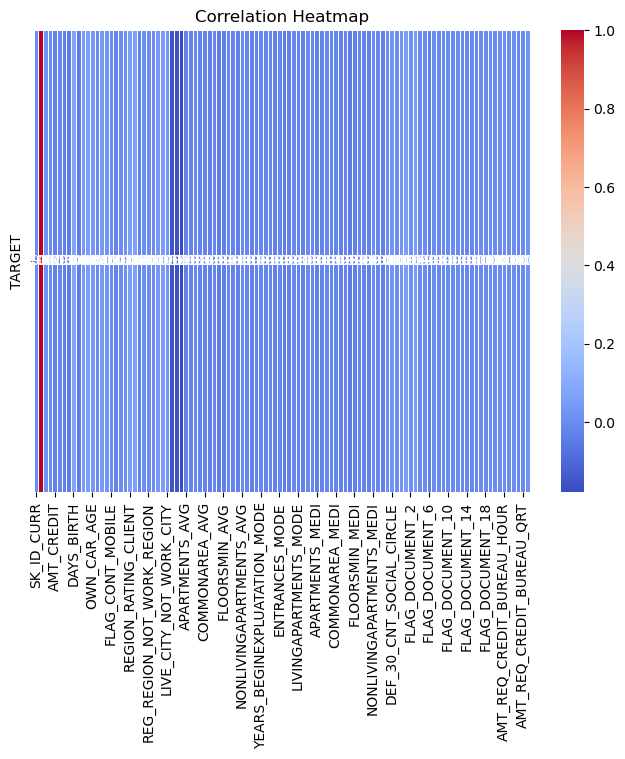

In [48]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_heatmap, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

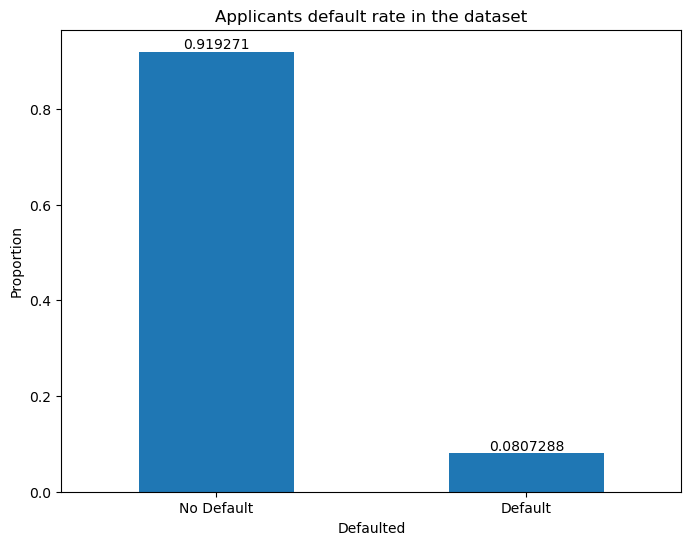

In [21]:
# Target variable bar graph
ax = df_app["TARGET"].value_counts(normalize = True)\
                             .plot(kind = "bar", 
                                   figsize = (8, 6),
                                   title = "Applicants default rate in the dataset",
                                   xlabel = "Defaulted",
                                   ylabel = "Proportion",
                                   rot = 0)
for i in ax.containers:
    ax.bar_label(i)
    
plt.xticks([0, 1], ["No Default", "Default"])
plt.show()


C:\Users\jaspr\AppData\Local\Temp\ipykernel_1816\1673201907.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{tick/total:.0%}' for tick in ax.get_yticks()])


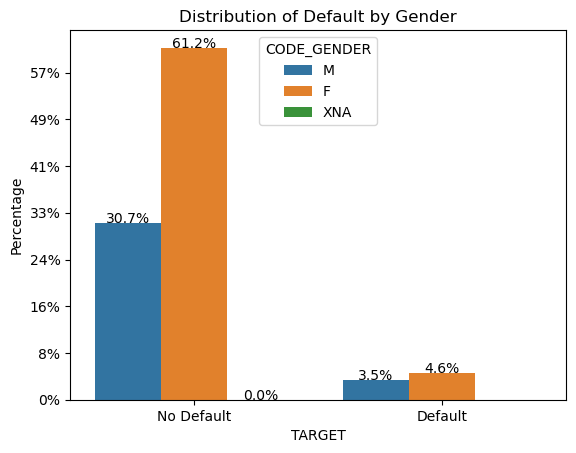

In [22]:
# Distribution of Default by Gender
ax = sns.countplot(data = df_app, 
                       x = "TARGET",
                       hue = "CODE_GENDER",
                       order = df_app["TARGET"].value_counts().index)

total = len(df_app)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline')

ax.set_yticklabels([f'{tick/total:.0%}' for tick in ax.get_yticks()])    
plt.title("Distribution of Default by Gender")
plt.xticks([0, 1], ["No Default", "Default"])
plt.ylabel("Percentage")
plt.show()

C:\Users\jaspr\AppData\Local\Temp\ipykernel_1816\1971398170.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{tick/total:.0%}' for tick in ax.get_yticks()])


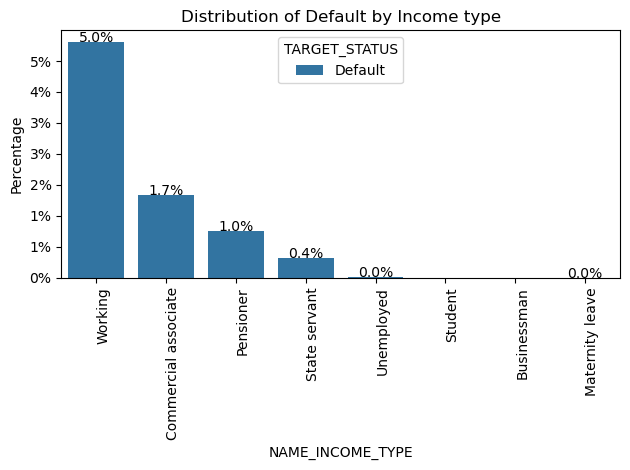

In [23]:
# Distribution of Default by Gender
ax = sns.countplot(data = df_app[df_app['TARGET_STATUS']=='Default'], 
                       x = "NAME_INCOME_TYPE",
                       hue = "TARGET_STATUS",
                       order = df_app["NAME_INCOME_TYPE"].value_counts().index)

total = len(df_app)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline')

ax.set_yticklabels([f'{tick/total:.0%}' for tick in ax.get_yticks()])   

plt.title("Distribution of Default by Income type")
# plt.xticks([1], [ "Default"])
plt.ylabel("Percentage")
plt.xticks(rotation=90,ha='right',wrap=True)
plt.tight_layout()
plt.show()

C:\Users\jaspr\AppData\Local\Temp\ipykernel_1816\1142844081.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{tick/total:.0%}' for tick in ax.get_yticks()])


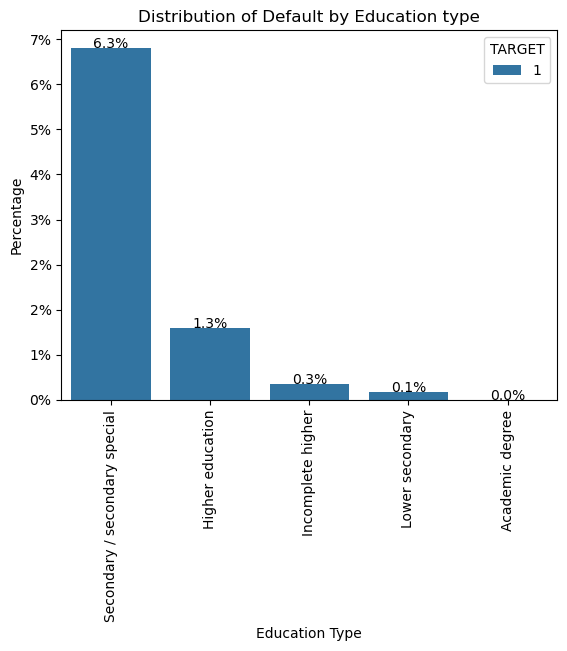

In [24]:
ax = sns.countplot(data=df_app[df_app['TARGET_STATUS'] == 'Default'],
                   x="NAME_EDUCATION_TYPE",
                   hue="TARGET",
                   order=df_app["NAME_EDUCATION_TYPE"].value_counts().index)

total = len(df_app)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline')

ax.set_yticklabels([f'{tick/total:.0%}' for tick in ax.get_yticks()])    
plt.title("Distribution of Default by Education type")
plt.xlabel("Education Type")  # Corrected x-axis label
plt.ylabel("Percentage")
plt.xticks(rotation=90)
plt.show()

C:\Users\jaspr\AppData\Local\Temp\ipykernel_1816\3631669918.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{tick/total:.0%}' for tick in ax.get_yticks()])


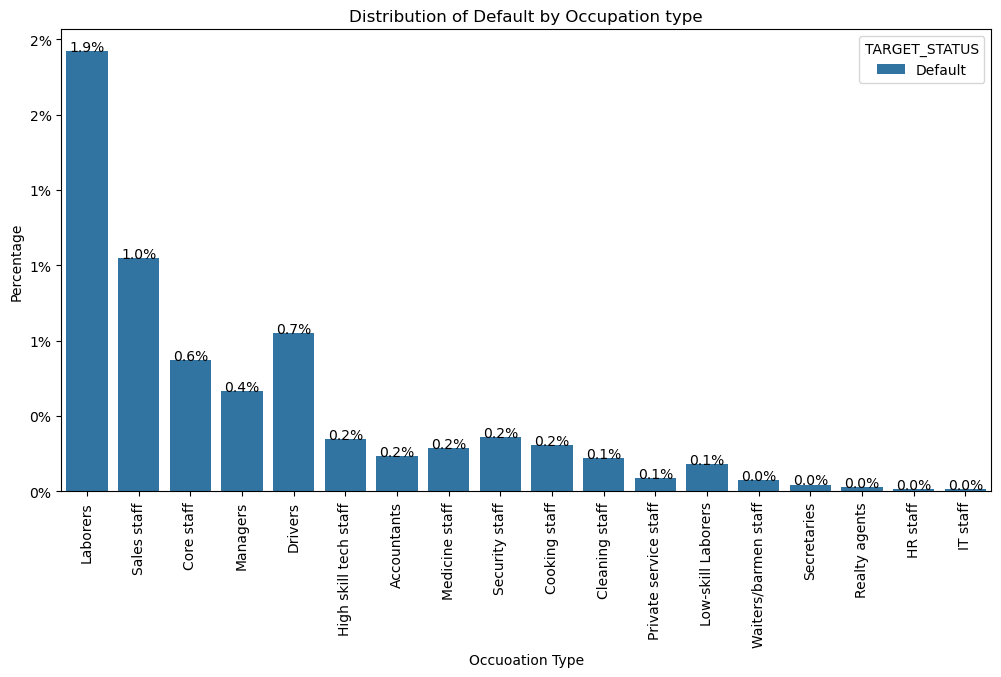

In [25]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_app[df_app['TARGET_STATUS'] == 'Default'],
                   x="OCCUPATION_TYPE",
                   hue="TARGET_STATUS",
                   order=df_app["OCCUPATION_TYPE"].value_counts().index)

total = len(df_app)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline')

ax.set_yticklabels([f'{tick/total:.0%}' for tick in ax.get_yticks()])    
plt.title("Distribution of Default by Occupation type")
plt.xlabel("Occuoation Type")  # Corrected x-axis label
plt.ylabel("Percentage")
plt.xticks(rotation=90)
plt.show()

C:\Users\jaspr\AppData\Local\Temp\ipykernel_1816\1151095406.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{tick/total:.0%}' for tick in ax.get_yticks()])


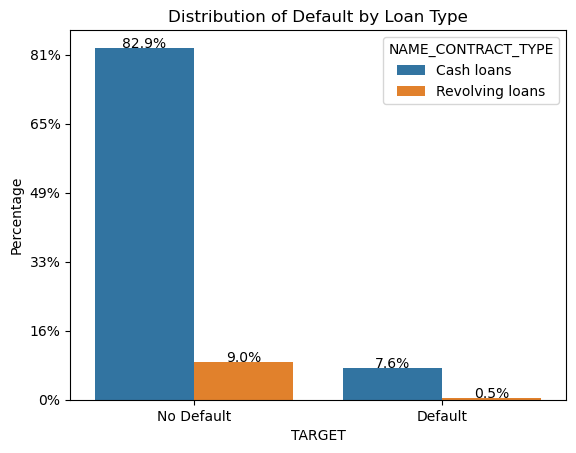

In [26]:
# Distribution of Default by Loan type
ax = sns.countplot(data = df_app, 
                       x = "TARGET",
                       hue = "NAME_CONTRACT_TYPE",
                       order = df_app["TARGET"].value_counts().index)

total = len(df_app)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline')

ax.set_yticklabels([f'{tick/total:.0%}' for tick in ax.get_yticks()])    
plt.title("Distribution of Default by Loan Type")
plt.xticks([0, 1], ["No Default", "Default"])
plt.ylabel("Percentage")
plt.show()

C:\Users\jaspr\AppData\Local\Temp\ipykernel_1816\4126905870.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{tick/total:.0%}' for tick in ax.get_yticks()])


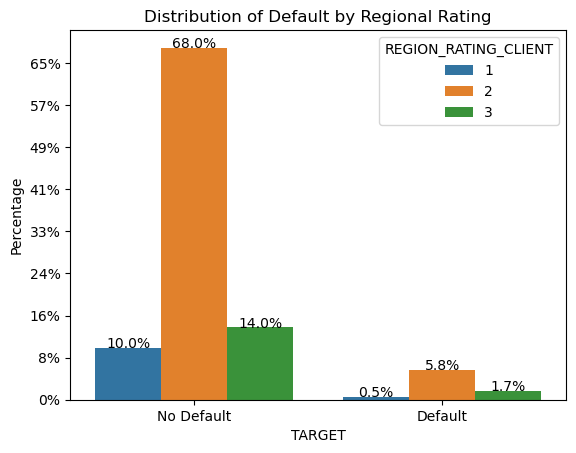

In [27]:
# Distribution of Default by Regional rating
ax = sns.countplot(data = df_app, 
                       x = "TARGET",
                       hue = "REGION_RATING_CLIENT",
                       order = df_app["TARGET"].value_counts().index)

total = len(df_app)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline')

ax.set_yticklabels([f'{tick/total:.0%}' for tick in ax.get_yticks()])    
plt.title("Distribution of Default by Regional Rating")
plt.xticks([0, 1], ["No Default", "Default"])
plt.ylabel("Percentage")
plt.show()